<a href="https://colab.research.google.com/github/mezoalaa/BUCKLE-UP/blob/main/ML_Project_Loan_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # manipulating data
import seaborn as sns # visulization dataset
import matplotlib.pyplot as plt  # visulization dataset
import numpy as np # linear algebra



In [ ]:
import plotly.graph_objs as go

In [ ]:
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
%matplotlib inline

dataset = pd.read_csv("C:\\loan_approval_dataset.csv",";")
dataset

In [ ]:

dataset = pd.read_csv("/content/loan_dataset.csv")
dataset


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [ ]:
dataset.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [ ]:
dataset.shape

(4269, 13)

In [ ]:
dataset.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [ ]:
target_count=dataset.loan_status. value_counts()
print('class 0:' , target_count[0])
print('class 1:' , target_count[1])

class 0: 2656
class 1: 1613


In [ ]:
print('loan_status' in dataset.columns)


True


In [ ]:
print(dataset.columns)


Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       ' luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


<Axes: title={'center': 'count of traget'}>

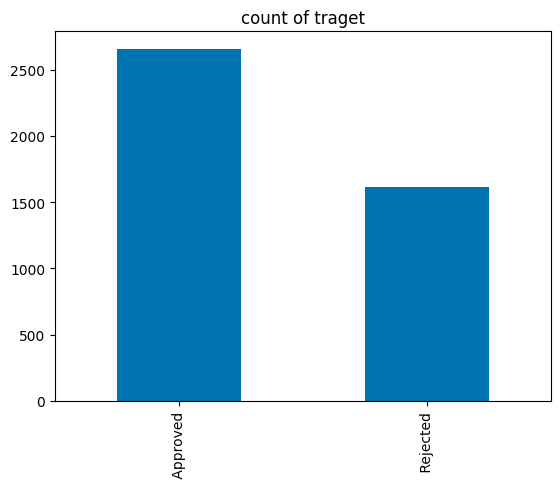

In [ ]:
target_count.plot(kind ='bar',title = 'count of traget' , color = "#0072b0")

**# preprocessing of data **

In [ ]:
dataset.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
 luxury_assets_value        0
bank_asset_value            0
loan_status                 0
dtype: int64

In [ ]:
dumm_var = pd.get_dummies(dataset.self_employed,prefix="self_employed_dummy").iloc[:,1:]
dumm_var = pd.get_dummies(dataset.self_employed,prefix="education_dummy").iloc[:,1:]


In [ ]:
dumm_var = pd.get_dummies(dataset.self_employed,prefix="self_employed_dummy").iloc[:,1:]


In [ ]:
new_dataset_after_dummy = pd.concat([dataset,dumm_var],axis=1)
new_dataset_after_dummy

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,self_employed_dummy_ Yes
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,0
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,1
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,0
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,0
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected,1
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved,1
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected,0
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved,0


In [ ]:
print(dataset.shape)
dataset.describe()

(4269, 13)


,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [ ]:
dataset.describe(include = 'all')

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269,4269,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Graduate,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved
freq,NaN,NaN,2144,2150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2656
mean,2135.000000,2.498712,NaN,NaN,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,NaN
std,1232.498479,1.695910,NaN,NaN,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,NaN
min,1.000000,0.000000,NaN,NaN,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,NaN
25%,1068.000000,1.000000,NaN,NaN,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,NaN
50%,2135.000000,3.000000,NaN,NaN,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,NaN
75%,3202.000000,4.000000,NaN,NaN,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,NaN


### **# feature selection **

In [ ]:
dataset.corr()

<ipython-input-24-c187c74d1e71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
loan_id,1.000000,0.005326,0.012592,0.008170,0.009809,0.016323,0.020936,0.018595,-0.000862,0.010765
no_of_dependents,0.005326,1.000000,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163
income_annum,0.012592,0.007266,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093
loan_amount,0.008170,-0.003366,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122
loan_term,0.009809,-0.020111,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177
cibil_score,0.016323,-0.009998,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478
residential_assets_value,0.020936,0.007376,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418
commercial_assets_value,0.018595,-0.001531,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576
luxury_assets_value,-0.000862,0.002817,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517
bank_asset_value,0.010765,0.011163,0.851093,0.788122,0.017177,-0.015478,0.527418,0.548576,0.788517,1.000000


In [ ]:
dataset.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


Text(0.5, 1.0, 'loan_status_of_bank')

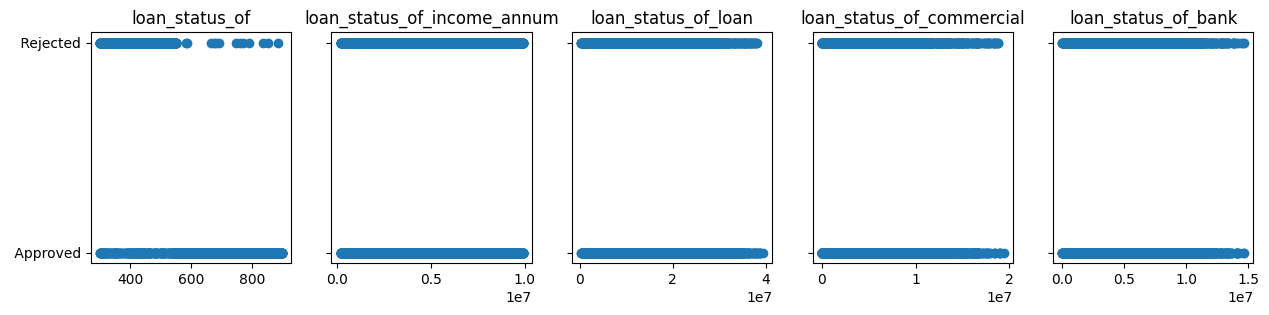

In [ ]:
f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5, sharey=True, figsize=(15,3))
ax1.scatter(dataset['cibil_score'], dataset['loan_status'])
ax1.set_title('loan_status_of')
ax2.scatter(dataset['income_annum'], dataset['loan_status'])
ax2.set_title('loan_status_of_income_annum')
ax3.scatter(dataset['loan_amount'], dataset['loan_status'])
ax3.set_title('loan_status_of_loan')
ax4.scatter(dataset['commercial_assets_value'], dataset['loan_status'])
ax4.set_title('loan_status_of_commercial')
ax5.scatter(dataset['bank_asset_value'], dataset['loan_status'])
ax5.set_title('loan_status_of_bank')

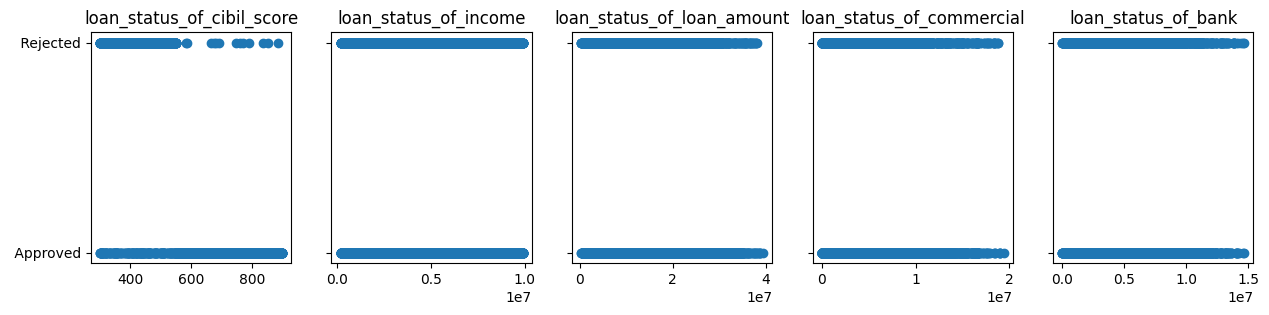

In [ ]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, sharey=True, figsize=(15, 3))

ax1.scatter(dataset['cibil_score'], dataset['loan_status'])
ax1.set_title('loan_status_of_cibil_score')

ax2.scatter(dataset['income_annum'], dataset['loan_status'])
ax2.set_title('loan_status_of_income')

ax3.scatter(dataset['loan_amount'], dataset['loan_status'])  # Corrected column name
ax3.set_title('loan_status_of_loan_amount')

ax4.scatter(dataset['commercial_assets_value'], dataset['loan_status'])
ax4.set_title('loan_status_of_commercial')

ax5.scatter(dataset['bank_asset_value'], dataset['loan_status'])
ax5.set_title('loan_status_of_bank')
plt.show()

In [ ]:
print(dataset.columns)


Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       ' luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


### data **split**

In [ ]:
X = dataset[['cibil_score','income_annum','loan_amount','commercial_assets_value','bank_asset_value']]
y = dataset[['loan_status']]
X
y

,loan_status
0,Approved
1,Rejected
2,Rejected
3,Rejected
4,Rejected
...,...
4264,Rejected
4265,Approved
4266,Rejected
4267,Approved


# data splitting 80% train 20% test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train,X_test, y_train,y_test

(      loan_id  no_of_dependents  income_annum  loan_amount  loan_term  \
 1675     1676                 5       7900000     29900000          6   
 1164     1165                 0       9600000     34000000         12   
 192       193                 1        800000      2900000          8   
 910       911                 2       4900000     13100000         18   
 567       568                 5       3000000     11100000         12   
 ...       ...               ...           ...          ...        ...   
 3444     3445                 0       1300000      4700000         16   
 466       467                 5        500000      1800000         18   
 3092     3093                 4       8600000     20600000         16   
 3772     3773                 2       7000000     21400000         12   
 860       861                 4       6200000     17300000          6   
 
       cibil_score  residential_assets_value  commercial_assets_value  \
 1675          568                   

# classification model _ DTREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(criterion="entropy", random_state=0, max_depth=5, min_samples_leaf=6)


In [ ]:
model

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=6,
                       random_state=0)

# **training** **model**

In [ ]:
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=6,
                       random_state=0)

# predictions on the training



In [ ]:
y_pred_train = model.predict(X_train)


In [ ]:
y = dataset['loan_status']
X = dataset.drop('loan_status', axis=1)

In [ ]:
X = pd.get_dummies(X)


# testing

In [ ]:
y_pred = model.predict(X_train)
y_pred

array([' Approved', ' Approved', ' Approved', ..., ' Rejected',
       ' Rejected', ' Approved'], dtype=object)

#the accuracy on the training

In [ ]:
from sklearn.metrics import accuracy_score
# y-test = real     # y-pres = results model

In [ ]:
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Accuracy on the training set: {accuracy_train}")

Accuracy on the training set: 0.972181551976574


In [ ]:
y_pred_test = model.predict(X_test)


In [ ]:
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy on the test set: {accuracy_test}")

Accuracy on the test set: 0.9718969555035128


#so now i have overfiting

In [ ]:
pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#Data Preparation:
Prepare your data by splitting it into features (X) and the target variable (y).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Standardize/normalize your data


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Build the Neural Network Model:
Create a neural network model using the Sequential API.

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#Compile the Model:
Compile the model by specifying the optimizer, loss function, and metrics.

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


#Train the Model:


In [ ]:
model.fit(X_train_scaled, y_train, epochs=15, batch_size=32, validation_split=0.2)


Epoch 1/15
86/86 [==============================] - 0s 5ms/step - loss: 0.0315 - accuracy: 0.9927 - val_loss: 0.0976 - val_accuracy: 0.9605
Epoch 2/15
86/86 [==============================] - 0s 4ms/step - loss: 0.0313 - accuracy: 0.9898 - val_loss: 0.1056 - val_accuracy: 0.9590
Epoch 3/15
86/86 [==============================] - 0s 4ms/step - loss: 0.0319 - accuracy: 0.9923 - val_loss: 0.1030 - val_accuracy: 0.9590
Epoch 4/15
86/86 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.9916 - val_loss: 0.1110 - val_accuracy: 0.9619
Epoch 5/15
86/86 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.9908 - val_loss: 0.0974 - val_accuracy: 0.9605
Epoch 6/15
86/86 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9916 - val_loss: 0.1057 - val_accuracy: 0.9561
Epoch 7/15
86/86 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.9927 - val_loss: 0.1070 - val_accuracy: 0.9575
Epoch 8/15
86/86 [==

In [ ]:
print(y_train.dtypes)


AttributeError: ignored

In [ ]:
y_train = y_train.astype(int)


In [ ]:
print(y_train.unique())


AttributeError: ignored

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)


#Evaluate the Model

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

27/27 [==============================] - 0s 2ms/step - loss: 0.1092 - accuracy: 0.9543
Test Loss: 0.10924036055803299, Test Accuracy: 0.9543325304985046


In [ ]:
print(y_test.dtypes)


object


In [ ]:
y_test = y_test.astype(int)


In [ ]:
print(y_test.unique())


[' Rejected' ' Approved']


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_test = label_encoder.fit_transform(y_test)


#Make Predictions:
Use the trained model to make predictions on new data.

In [ ]:
predictions = model.predict(X_test_scaled)


27/27 [==============================] - 0s 2ms/step


In [ ]:
model.predict(X_test_scaled)

27/27 [==============================] - 0s 6ms/step


array([[1.00000000e+00],
       [3.17716763e-06],
       [1.00000000e+00],
       [2.10472223e-07],
       [1.58011756e-10],
       [2.61189015e-10],
       [7.24334859e-06],
       [9.99992430e-01],
       [2.98775576e-05],
       [9.99996901e-01],
       [9.85121667e-01],
       [6.94759583e-09],
       [2.67078049e-05],
       [9.78688478e-01],
       [1.00000000e+00],
       [3.72854667e-03],
       [9.16443099e-08],
       [1.53292954e-01],
       [9.52844560e-01],
       [1.00000000e+00],
       [3.66550870e-03],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [6.26960373e-10],
       [1.74732675e-04],
       [5.44771304e-08],
       [9.83403936e-09],
       [3.20829192e-12],
       [1.00000000e+00],
       [1.51117088e-13],
       [1.00000000e+00],
       [9.94595170e-01],
       [1.01110636e-05],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.95216876e-03],
       [1.92449540e-02],
       [1.32454658e-16],
       [1.00000000e+00],


### #This line uses your trained neural network model to make predictions on the scaled test data (X_test_scaled). The result is an array of predicted values for each sample in the test set.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


### #predicted probabilities to binary predictions (0 or 1)

In [ ]:
binary_predictions = (predictions > 0.5).astype(int)


# Evaluate accuracy


In [ ]:
accuracy = accuracy_score(y_test, binary_predictions)


In [ ]:
print(f"Accuracy: {accuracy}")


Accuracy: 0.9543325526932084


# Display confusion matrix and classification report

In [ ]:
conf_matrix = confusion_matrix(y_test, binary_predictions)
class_report = classification_report(y_test, binary_predictions)

In [ ]:
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[515  21]
 [ 18 300]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       536
           1       0.93      0.94      0.94       318

    accuracy                           0.95       854
   macro avg       0.95      0.95      0.95       854
weighted avg       0.95      0.95      0.95       854



Confusion Matrix:
A confusion matrix is a table used in machine learning to evaluate the performance of a classification algorithm. It compares the predicted labels with the actual labels and consists of four values: True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN).
True Positives (TP): 515
True Negatives (TN): 300
False Positives (FP): 21
False Negatives (FN): 18

Classification Report:
The classification report provides additional metrics such as precision, recall, and F1-score for each class, as well as the overall accuracy.

Precision: The ability of the classifier not to label as positive a sample that is negative.
Recall (Sensitivity or True Positive Rate): The ability of the classifier to find all the positive samples.
F1-Score: The weighted average of precision and recall.
Support: The number of actual occurrences of the class in the specified dataset.

Interpretation:
For class 0 (negative class):

Precision: 97% (Out of all predicted negatives, 97% are true negatives)
Recall: 96% (Out of all actual negatives, 96% are correctly predicted)
F1-Score: 96%
For class 1 (positive class):

Precision: 93% (Out of all predicted positives, 93% are true positives)
Recall: 94% (Out of all actual positives, 94% are correctly predicted)
F1-Score: 94%
Overall Accuracy: 95%

 thia model seems to perform well, with high precision, recall, and accuracy.